In [ ]:
"""
Определять правильно типы признаков в данных очень важно, так как не все методы мы можем применять к любым типам признаков.
Кроме того, не все признаки можно сразу использовать - некоторые требуют дополнительной предобработки.
Поэтому прежде, чем приступить к решению задачи, необходимо посмотреть на датасет и понять, с какими признаками вы имеете дело.

Один из крупных российских банков предоставил данные о московских квартирах, выставленных на продажу:

"""

In [4]:
import numpy as np
import pandas as pd

In [5]:
data.head()


,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   sub_area                               30469 non-null  object 
 5   preschool_quota                        23781 non-null  float64
 6   preschool_education_centers_raion      30469 non-null  int64  
 7   school_quota                           23784 non-null  float64
 8   school_education_centers_raion         30469 non-null  int64  
 9   school_education_centers_top_20_raion  30469 non-null  int64  
 10  hospital_beds_raion                    16029 non-null  float64
 11  he

In [ ]:
"""
Задание 2.6.6

Загрузите данные train.csv, найдите признак, обозначающий штат. Затем найдите значение, которое встречается чаще всего.
Замените пропуски этим значением и запишите получившийся признак в переменную result.

"""

In [10]:
vis_data = pd.read_csv("input/train.csv", encoding = 'ISO-8859-1', low_memory = False)
vis_data.head()

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
3,22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
4,22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


In [11]:
# найдите признак, обозначающий штат
vis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   violation_zip_code          0 non-null       float64
 7   mailing_address_str_number  246704 non-null  float64
 8   mailing_address_str_name    250302 non-null  object 
 9   city                        250306 non-null  object 
 10  state                       250213 non-null  object 
 11  zip_code                    250305 non-null  object 
 12  non_us_str_code             3 non-null       object 
 13  country       

In [17]:
vis_data['state'].nunique()

59

In [18]:
vis_data['state'].unique()

array(['IL', 'MI', 'CA', 'NY', 'VA', 'MN', 'NV', 'PA', 'LA', 'MD', 'FL',
       'ME', 'TN', 'KY', 'TX', 'AZ', 'OH', 'GA', 'AR', 'KS', 'MO', 'WI',
       'IN', 'MS', 'MA', 'OR', 'NJ', 'WA', 'UT', 'SC', 'AL', 'AK', 'NB',
       'DC', 'CT', 'OK', 'UK', 'NC', 'CO', 'RI', 'NM', 'VT', 'MT', 'IA',
       'ID', 'DE', 'PR', 'NH', 'VI', 'SD', 'QC', 'ON', 'HI', 'QL', nan,
       'WY', 'WV', 'ND', 'BC', 'BL'], dtype=object)

In [40]:
# найдите значение, которое встречается чаще всего
l = vis_data['state'].value_counts().keys()
l[0]

'MI'

In [48]:
l = pd.value_counts(vis_data[["state"]].values.ravel())
l

MI    228601
CA      5020
TX      2420
FL      2237
IL      1310
SC      1304
OH       967
NY       673
MN       632
GA       535
NV       484
UT       477
PA       466
NJ       395
VA       385
NC       353
MD       349
AZ       329
ME       261
OK       248
AL       215
TN       207
WA       192
MA       182
WI       159
IA       159
OR       153
MO       151
CO       147
KY       146
IN       106
AR        82
LA        81
AK        79
NB        77
UK        77
MS        64
CT        60
DC        58
ON        51
DE        50
KS        37
RI        35
ID        33
SD        33
MT        28
NM        21
BC        17
WY        12
HI        10
NH         9
VT         7
VI         6
WV         6
QC         5
PR         5
QL         3
BL         2
ND         2
dtype: int64

In [41]:
# Замените пропуски этим значением

vis_data['state'].fillna(l[0])

0         IL
1         MI
2         MI
3         MI
4         MI
          ..
250301    MI
250302    MI
250303    MI
250304    MI
250305    MI
Name: state, Length: 250306, dtype: object

In [43]:
#  и запишите получившийся признак в переменную result

result = vis_data['state']
result

0         IL
1         MI
2         MI
3         MI
4         MI
          ..
250301    MI
250302    MI
250303    MI
250304    MI
250305    MI
Name: state, Length: 250306, dtype: object

In [46]:
vis_data['state'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
250301    False
250302    False
250303    False
250304    False
250305    False
Name: state, Length: 250306, dtype: bool

In [50]:
# Решение от автора:
vis_data = pd.read_csv("input/train.csv",
                        encoding = 'ISO-8859-1', 
                       low_memory = False)
mode_state = vis_data.state.value_counts().index[0]
correct_result = vis_data.state.fillna(mode_state)

correct_result

0         IL
1         MI
2         MI
3         MI
4         MI
          ..
250301    MI
250302    MI
250303    MI
250304    MI
250305    MI
Name: state, Length: 250306, dtype: object

In [ ]:
"""
Задание 2.6.7

Продолжим готовить к анализу наш Data set, посвященный квартирам, выставленным на продажу.
Избавимся от пропусков. Просто удалять данные с пропусками довольно грубо. Однако если у вас большое количество объектов,
и лишь крайне малая их доля имеет пропущенные значения, то это возможное допущение. Поступим здесь таким образом.
Нас будут интересовать только те квартиры, про которые продавцы заполнили все данные.
Удалите, пожалуйста, все строки, где есть хотя бы один пропуск. Сколько объектов осталось?

"""

In [51]:
data = pd.read_csv('input/data_flats.csv',sep=";")
data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   sub_area                               30469 non-null  object 
 5   preschool_quota                        23781 non-null  float64
 6   preschool_education_centers_raion      30469 non-null  int64  
 7   school_quota                           23784 non-null  float64
 8   school_education_centers_raion         30469 non-null  int64  
 9   school_education_centers_top_20_raion  30469 non-null  int64  
 10  hospital_beds_raion                    16029 non-null  float64
 11  he

In [53]:
data.dropna(axis=0)

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452
6,7,25,14.0,10.0,Sokol'niki,933.0,5,5050.0,5,0,...,0.513689,0.067725,0.273019,0.516979,0.822377,0.318230,0.752223,2.969315,poor,5500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30461,30466,56,29.0,13.0,Severnoe Tushino,4116.0,5,9891.0,5,0,...,0.232778,1.491458,0.648281,0.193474,0.283044,2.040548,23.720332,12.198090,satisfactory,12000000
30462,30467,56,51.0,19.0,Sviblovo,2057.0,1,3741.0,2,0,...,0.187828,0.969990,0.510751,0.566309,1.261711,0.532268,3.672399,2.988268,poor,10262010
30465,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.540003,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,25000000
30467,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.108672,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,13500000


In [ ]:
"""
Задание 2.8.3

Загрузите данные train.csv, найдите признак, обозначающий баланс. Нормализуйте признак с помощью std-нормализации.
Проверьте, что вы нашли нужный признак и нормализовали его подходящим методом. Метод для нормализации принимает матрицу,
а не массив. В numpy можно превратить массив в матрицу с помощью reshape(). В качестве ответа укажите минимальное значение
в получившемся нормализованном признаке. Ответ округлите до 5 знаков после запятой.

"""

In [71]:
# найдите признак, обозначающий баланс

vis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   violation_zip_code          0 non-null       float64
 7   mailing_address_str_number  246704 non-null  float64
 8   mailing_address_str_name    250302 non-null  object 
 9   city                        250306 non-null  object 
 10  state                       250213 non-null  object 
 11  zip_code                    250305 non-null  object 
 12  non_us_str_code             3 non-null       object 
 13  country       

In [72]:
vis_data['balance_due']

0         305.0
1          75.0
2           0.0
3           0.0
4           0.0
          ...  
250301      0.0
250302      0.0
250303      0.0
250304      0.0
250305      0.0
Name: balance_due, Length: 250306, dtype: float64

In [82]:
# Метод для нормализации принимает матрицу, а не массив. В numpy можно превратить массив в матрицу с помощью reshape()

len(vis_data['balance_due'].values)

a = vis_data['balance_due'].values.reshape(250306, 1) # так как он выглядит сейчас как одномерный массив, то он считается строкой, а не признаком. Задача: сделать его в столбец. Можно еще указать reshape(1, 1); 
a

array([[305.],
       [ 75.],
       [  0.],
       ...,
       [  0.],
       [  0.],
       [  0.]])

In [83]:
# Нормализуйте признак с помощью std-нормализации

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(a)

array([[ 0.13613444],
       [-0.24315767],
       [-0.36683987],
       ...,
       [-0.36683987],
       [-0.36683987],
       [-0.36683987]])

In [84]:
scaler.fit_transform(a).min()

-13.147334652567258

In [85]:
"""
Задание 2.10.3

Загрузите данные train.csv, найдите признак, обозначающий баланс.
Для приведения данных к более нормальному виду часто используют различные преобразования, например, взятие корня от признака.
Возьмите корень у положительных значений, найдите медианное и среднее значение. В качестве ответа укажите модуль разницы этих
значений.
"""

b = vis_data['balance_due'].values
b

array([305.,  75.,   0., ...,   0.,   0.,   0.])

In [86]:
# Для приведения данных к более нормальному виду часто используют различные преобразования, например, взятие корня от признака
# Возьмите корень у положительных значений

c = np.sqrt(vis_data.balance_due[vis_data.balance_due > 0])
c

0         17.464249
1          8.660254
5         17.464249
6         29.240383
7         11.832160
            ...    
250277    24.083189
250278    15.811388
250287    33.615473
250288    24.083189
250293    15.811388
Name: balance_due, Length: 137678, dtype: float64

In [91]:
# найдите медианное и среднее значение

print(c.mean())
print(c.median())

# В качестве ответа укажите модуль разницы этих значений.
print(c.mean() - c.median())

17.011653135633672
17.46424919657298
-0.4525960609393067


In [ ]:
"""
Практика на реальных данных
Вернемся к первичному анализу наших данных по квартирам, выставленным на продажу.
Предположим, что вы хотите проанализировать состояние цен на квартиры в нескольких  районах:
"Лефортово", "Перово", "Басманное" и "Богородское".
Для того, чтобы сравнить цены на квартирах в этих районах, можно использовать визуализацию с помощью боксплотов.
Постройте боксплоты для распределения цен по этим районами (должно получиться четыре боксплота - по одному для каждого района).
На основании полученных диаграмм ответьте на вопросы ниже.

"""

In [92]:
data['sub_area'].value_counts()

Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
                                  ... 
Molzhaninovskoe                      3
Poselenie Kievskij                   2
Poselenie Shhapovskoe                2
Poselenie Klenovskoe                 1
Poselenie Mihajlovo-Jarcevskoe       1
Name: sub_area, Length: 146, dtype: int64

In [111]:
data['sub_area'].unique()

array(['Bibirevo', 'Nagatinskij Zaton', "Tekstil'shhiki", 'Mitino',
       'Basmannoe', 'Nizhegorodskoe', "Sokol'niki", 'Koptevo', 'Kuncevo',
       'Kosino-Uhtomskoe', 'Zapadnoe Degunino', 'Presnenskoe',
       'Lefortovo', "Mar'ino", "Kuz'minki", 'Nagornoe', "Gol'janovo",
       'Vnukovo', 'Juzhnoe Tushino', 'Severnoe Tushino',
       "Chertanovo Central'noe", 'Fili Davydkovo', 'Otradnoe',
       'Novo-Peredelkino', 'Bogorodskoe', 'Jaroslavskoe', 'Strogino',
       'Hovrino', "Moskvorech'e-Saburovo", 'Staroe Krjukovo', 'Ljublino',
       'Caricyno', 'Veshnjaki', 'Danilovskoe', 'Preobrazhenskoe',
       "Kon'kovo", 'Brateevo', 'Vostochnoe Izmajlovo', 'Vyhino-Zhulebino',
       'Donskoe', 'Novogireevo', 'Juzhnoe Butovo', 'Sokol', 'Kurkino',
       'Izmajlovo', 'Severnoe Medvedkovo', 'Rostokino',
       'Orehovo-Borisovo Severnoe', 'Ochakovo-Matveevskoe', 'Taganskoe',
       'Dmitrovskoe', 'Orehovo-Borisovo Juzhnoe', 'Teplyj Stan',
       'Babushkinskoe', 'Pokrovskoe Streshnevo', 'Obruc

In [131]:
d = data[(data['sub_area']=='Basmannoe') | (data['sub_area']=='Lefortovo') | (data['sub_area']=='Perovo') | (data['sub_area']=='Bogorodskoe')]
d.filter(items=['sub_area', 'price_doc'])

,sub_area,price_doc
4,Basmannoe,16331452
14,Lefortovo,5000000
28,Bogorodskoe,8254400
56,Bogorodskoe,2000000
83,Basmannoe,990000
...,...,...
30254,Perovo,6900000
30331,Lefortovo,6800000
30401,Lefortovo,2000000
30438,Basmannoe,10000000


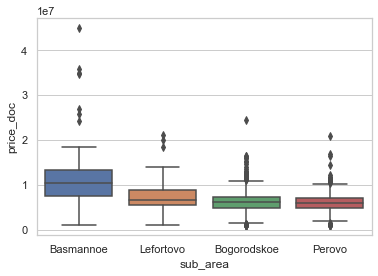

In [132]:
ax = sns.boxplot(x="sub_area", y="price_doc", data=d)
ax

In [ ]:
"""
Ранее мы уже выяснили, что данные о квартирах не все числовые. Есть и признаки, которые содержат текстовые значения:
ординальный (уровень экологии) и категориальный (район). Нам обязательно нужно перекодировать эти признаки, так как иначе мы
не сможем в дальнейшем работать с этим датасетом и применять на нем какие-то математические алгоритмы. 

Ординальный признак мы можем перекодировать в числовой довольно простым способом: просто заменить каждое значение на число
(4 - 'excellent', 3 - 'good' etc.).

Для этого необходимо:

 создать словарь, , сопоставляющий числовые значения от 0 до 4 описанию экологии от 'no data' до 'excellent' соответственно
 заменить значения в колонке ecology на заданные нами выше с помощью метода .replace :

"""

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   sub_area                               30469 non-null  object 
 5   preschool_quota                        23781 non-null  float64
 6   preschool_education_centers_raion      30469 non-null  int64  
 7   school_quota                           23784 non-null  float64
 8   school_education_centers_raion         30469 non-null  int64  
 9   school_education_centers_top_20_raion  30469 non-null  int64  
 10  hospital_beds_raion                    16029 non-null  float64
 11  he

In [137]:
data['ecology'].unique()

array(['good', 'excellent', 'poor', 'satisfactory', 'no data'],
      dtype=object)

In [141]:
ecology_dict = {'excellent': 4, 'good': 3, 'satisfactory': 2, 'poor': 1, 'no data': 0}
data.ecology = data.ecology.replace(to_replace=ecology_dict)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [143]:
data['ecology'].value_counts()

1    8017
0    7656
3    7173
4    3938
2    3685
Name: ecology, dtype: int64

In [146]:
data['sub_area'].nunique()

146

In [147]:
data_with_dummies = pd.get_dummies(data, columns=['sub_area'])
data_with_dummies

,id,full_sq,life_sq,floor,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,...,sub_area_Vnukovo,sub_area_Vojkovskoe,sub_area_Vostochnoe,sub_area_Vostochnoe Degunino,sub_area_Vostochnoe Izmajlovo,sub_area_Vyhino-Zhulebino,sub_area_Zamoskvorech'e,sub_area_Zapadnoe Degunino,sub_area_Zjablikovo,sub_area_Zjuzino
0,1,43,27.0,4.0,5001.0,5,11065.0,5,0,240.0,...,0,0,0,0,0,0,0,0,0,0
1,2,34,19.0,3.0,3119.0,5,6237.0,8,0,229.0,...,0,0,0,0,0,0,0,0,0,0
2,3,43,29.0,2.0,1463.0,4,5580.0,7,0,1183.0,...,0,0,0,0,0,0,0,0,0,0
3,4,89,50.0,9.0,6839.0,9,17063.0,10,0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,5,77,77.0,4.0,3240.0,7,7770.0,9,0,562.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30464,30469,44,27.0,7.0,5088.0,4,12721.0,4,0,NaN,...,0,0,0,0,0,0,0,0,0,0
30465,30470,86,59.0,3.0,1874.0,4,6772.0,4,1,1046.0,...,0,0,0,0,0,0,0,0,0,0
30466,30471,45,NaN,10.0,NaN,0,NaN,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
30467,30472,64,32.0,5.0,2372.0,6,6083.0,8,0,3300.0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
data_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Columns: 201 entries, id to sub_area_Zjuzino
dtypes: float64(41), int64(14), uint8(146)
memory usage: 17.0 MB


In [149]:
data['ecology'].mean()

1.7282483836030063